In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import TensorBoard
import nltk 

from nltk.tokenize import sent_tokenize, word_tokenize
import time
from sklearn.feature_extraction.text import CountVectorizer

Name = "Spetic-non-cnn64*x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))


In [138]:
news_data = pd.read_csv("News_Dataset.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# print a summary of the data in news_data

news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
news_data.head(20)


,0,1
0,While the Congress seems to be in revival mode...,1
1,"In Congress, it’s a problem of plenty with too...",1
2,Though the BJP leadership has been reportedly ...,0
3,The political predicament also appears to be t...,0
4,"The party leadership, mainly PM Narendra Modi ...",1
5,The CM had planned to meet the duo when he com...,0
6,He’s now scheduled to visit New Delhi on Thurs...,0
7,Speculations are rife in party circles that he...,1
8,"“If he fails to do so, he would face open rebe...",0
9,“Further delay is likely. Despite threats from...,0


In [139]:
X = news_data[0].values
Y = news_data[1].values
print(X.shape)
x_train ,  x_test ,y_train ,  y_test = train_test_split(X , Y  , test_size = 0.05)
print(x_train.shape , y_train.shape)
print((x_train))

(1800,)
(1710,) (1710,)
['A total of 2,311 people tested positive for the viral disease on Saturday, the 17th consecutive day when more than 2,000 people tested positive.'
 'The accused had gone to Himachal by bus to buy charas.'
 'Payment through digital mode should be encouraged as much as possible and precautions should be taken while handling cash, it was stated.'
 ...
 'During his interaction with the press here on Wednesday, Mishra said, “They (state government) are the one who claimed that they will not allow anyone to sell the country, but today they are selling all the strategic assets of the country, including oil and gas resources and even Railways. In UP, they are planning to sell JPNIC, which has been built keeping in mind betterment of the people. I protest and appeal to the government not to sell it,” Mishra said.'
 'Speaking about his virtual interactions with Chennaiyin FC players ahead of his arrival in Goa, Laszlo said it has been a challenge but they were coping wit

In [140]:
tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
tokenizer.fit_on_texts(x_train)
print(x_train)

['A total of 2,311 people tested positive for the viral disease on Saturday, the 17th consecutive day when more than 2,000 people tested positive.'
 'The accused had gone to Himachal by bus to buy charas.'
 'Payment through digital mode should be encouraged as much as possible and precautions should be taken while handling cash, it was stated.'
 ...
 'During his interaction with the press here on Wednesday, Mishra said, “They (state government) are the one who claimed that they will not allow anyone to sell the country, but today they are selling all the strategic assets of the country, including oil and gas resources and even Railways. In UP, they are planning to sell JPNIC, which has been built keeping in mind betterment of the people. I protest and appeal to the government not to sell it,” Mishra said.'
 'Speaking about his virtual interactions with Chennaiyin FC players ahead of his arrival in Goa, Laszlo said it has been a challenge but they were coping with it positively.'
 '“I’m

In [141]:
vocab_size = len(tokenizer.word_index) + 1  

data = []
punc = '.'
for i in x_train:
    i = i[:-1]
    token = word_tokenize(i)
    if punc in token:
        for index ,val in enumerate(token):
            if punc == val:
                token.pop(index) 
#     x_train = tokenizer.texts_to_sequences(token)           
    data.append(token)

x_train = tokenizer.texts_to_sequences(data) 
x_test = tokenizer.texts_to_sequences(x_test)

In [142]:
maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
print(x_train)

news_data.info()

[[   6   96    3 ...    0    0    0]
 [   1  303   29 ...    0    0    0]
 [3851  158  924 ...    0    0    0]
 ...
 [  70   38 7562 ...    0    0    0]
 [ 783   78   38 ...    0    0    0]
 [3720   51 6865 ...    0    0    0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1800 non-null   object
 1   1       1800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.2+ KB


In [143]:
y_train = np.array(y_train)
print(x_train.shape)

(1710, 100)


In [144]:
embedding_dim = 50
# embedding_matrix = create_embedding_matrix('glove.6B.50d.txt' ,tokenizer.word_index,  embedding_dim)

In [155]:
from keras import layers

model = Sequential()

model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10,batch_size=10)

Epoch 1/10
171/171 [==============================] - 3s 18ms/step - loss: 0.5294 - accuracy: 0.7942
Epoch 2/10
171/171 [==============================] - 2s 15ms/step - loss: 0.4666 - accuracy: 0.7942
Epoch 3/10
171/171 [==============================] - 3s 17ms/step - loss: 0.2917 - accuracy: 0.8655
Epoch 4/10
171/171 [==============================] - 3s 16ms/step - loss: 0.1178 - accuracy: 0.9614
Epoch 5/10
171/171 [==============================] - 3s 15ms/step - loss: 0.0792 - accuracy: 0.9702
Epoch 6/10
171/171 [==============================] - 3s 15ms/step - loss: 0.0668 - accuracy: 0.9754
Epoch 7/10
171/171 [==============================] - 3s 15ms/step - loss: 0.0638 - accuracy: 0.9743
Epoch 8/10
171/171 [==============================] - 3s 15ms/step - loss: 0.0584 - accuracy: 0.9719
Epoch 9/10
171/171 [==============================] - 3s 17ms/step - loss: 0.0535 - accuracy: 0.9760
Epoch 10/10
171/171 [==============================] - 3s 15ms/step - loss: 0.0533 - accura

In [157]:
acc = model.evaluate(x_test  , y_test)
print(acc) 


3/3 [==============================] - 0s 12ms/step - loss: 0.3634 - accuracy: 0.8556
[0.36337602138519287, 0.855555534362793]


In [158]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0]


In [159]:
def mapper(a):
    a = tokenizer.texts_to_sequences(a)
    return pad_sequences(a, padding='post', maxlen=maxlen)


x_eval = mapper(['he said, "the world goes round and round and round"',
        'Even Bangladesh leader Khaleda Zia has said the terrorists are being trained in India and sent to Bangladesh to create disturbance'])

y_eval = np.array([0, 1])
model.evaluate(x_eval, y_eval)

for i in model.predict(x_eval):
    print(round(i[0]))

1/1 [==============================] - 0s 1ms/step - loss: 1.2072 - accuracy: 0.5000
0
0


In [160]:
y_pred = model.predict(x_test)
y_pred = [round(i[0]) for i in y_pred]

In [164]:
from sklearn.metrics import confusion_matrix
y = confusion_matrix(y_test, y_pred)
print(y)

[[72  1]
 [12  5]]


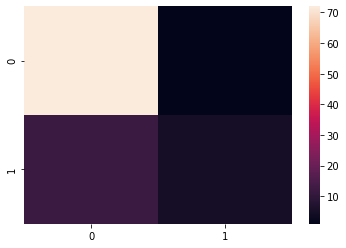

In [163]:
import seaborn as sns

sns.heatmap(y)

create_csv.py      glove.6B.50d.txt  mergecsv.py       septic.model/
current.csv        kunal1.csv        News_data.csv     septic_or_not.ipynb
glove.6B.100d.txt  kunal.csv         News_Dataset.csv  septic.save/
glove.6B.200d.txt  kunal.txt         para.txt
glove.6B.300d.txt  logs/             senten_maker.py
